Análisis de producción de Sinaloa

In [2]:
#importar librerías

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from openpyxl import load_workbook
import numpy as np
import geopandas as gpd
from matplotlib.gridspec import GridSpec


In [3]:
#Crear una lista con los nombres de cada hoja del archivo 'producción_Sinaloa.xlsx'

file = '''producción_Sinaloa.xlsx'''

sheet_name = load_workbook ( file , read_only= True ).sheetnames 


['semi-intensivo',
 'semi-intensivo-cosecha',
 'hiper_intensivo',
 'hiper_intensivo_cosecha',
 'fecha de actualización']

In [4]:
#Crear un diccionario que contenga cada tabla del archivo 'producción_Sinaloa' con el nombre de la llave de su respectiva hoja

dfs = { i : pd.read_excel ( file , sheet_name = i )  for i in sheet_name  }

#Eliminar columnas basura de tabla de fecha y 'NA'

dfs [ 'fecha de actualización' ] = dfs [ 'fecha de actualización' ] [ ['Folio' , 'Fecha de actualización'] ].dropna()

#Ingresar la fecha a cada tabla uniendo las tablas con la de fecha de actualización

##Crea un loop for que recorra la lista de nombre de las tablas según la lista sheet_name
for i in range ( len ( sheet_name ) ) [ : -1 ] : 

    # utilizar merge para unir las tablas, dentro del diccionario dfs (key = i), según la columna folio_fecha de las tablas y folio de la tabla de fechas; eliminar columnas inservibles

    m = dfs [sheet_name [ i ]].merge (dfs [ sheet_name [ -1 ] ] , left_on= 'folio_fecha' , right_on = 'Folio' ).drop ( columns= [ 'folio' , 'Folio' , ] ) 

    #Cambiar el orden de las columnas para que la fecha de actualización sea la primera

    m = m [ [ m.columns.to_list () [ -1] ] +  ( m.columns.to_list () [ : -1] ) ]

    dfs [ sheet_name [ i ] ] = m

    

In [5]:
#Crear variables

semi_siembra = dfs [ 'semi-intensivo']

semi_cosecha = dfs [ 'semi-intensivo-cosecha' ]

hiper_siembra = dfs [ 'hiper_intensivo' ]

hiper_cosecha = dfs [ 'hiper_intensivo_cosecha' ]

mapa sinaloa

In [6]:
pth = "E:/794551067314_s/25_sinaloa/conjunto_de_datos/25mun.dbf"
tracts = gpd.GeoDataFrame.from_file(pth)
print("Observations, Attributes:", tracts.shape)
tracts = tracts.sort_values ( 'CVE_MUN')

tracts [ 'jsla' ] = [ 'ahome' , 'angostura' , 'badiraguato' , 'concordia' , 'cosala' , 'culiacán' , 'choix' , 'elota' , 'escuinapa' , 'el fuerte' , 
                     'guasave' , 'mzt-san ignacio' , 'mocorito' , 'rosario' , 'salvador alvarado' , 'mzt-san ignaco' , 'sinaloa' , 'navolato' ]

tracts 

Observations, Attributes: (18, 5)


,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry,jsla
17,25001,25,001,Ahome,"POLYGON ((1804382.444 1610962.613, 1804402.434...",ahome
15,25002,25,002,Angostura,"MULTIPOLYGON (((1861565.220 1471194.549, 18615...",angostura
3,25003,25,003,Badiraguato,"POLYGON ((1959299.447 1575330.583, 1960926.416...",badiraguato
1,25004,25,004,Concordia,"POLYGON ((2097330.419 1309267.173, 2097350.053...",concordia
2,25005,25,005,Cosalá,"POLYGON ((2010550.444 1428529.584, 2010743.213...",cosala
14,25006,25,006,Culiacán,"POLYGON ((1978554.603 1479477.707, 1981985.899...",culiacán
11,25007,25,007,Choix,"POLYGON ((1860025.378 1679042.320, 1860069.325...",choix
10,25008,25,008,Elota,"POLYGON ((2017320.343 1368587.636, 2017460.436...",elota
0,25009,25,009,Escuinapa,"POLYGON ((2117304.509 1219927.424, 2120195.007...",escuinapa
9,25010,25,010,El Fuerte,"POLYGON ((1840295.884 1637496.349, 1841395.895...",el fuerte


Semi intensivo general

Siembra

In [7]:
#Hectáreas totales sembradas y por ciclo

ha_sembradas = semi_siembra [ [ 'ciclo' , 'hectareas_sembradas_periodo' , 'granjas_sembradas_preriodo'  ] ].groupby ( 'ciclo' ).sum().reset_index()

ha_sembradas ['ciclo'] = ha_sembradas ['ciclo'].astype ( 'str' )

ha_sembradas.loc[3] = ['total' , ha_sembradas [ 'hectareas_sembradas_periodo'].sum()  , ha_sembradas [ 'granjas_sembradas_preriodo'].sum() ]

ha_sembradas ['porcentaje'] = ha_sembradas [ 'hectareas_sembradas_periodo' ] / ha_sembradas['hectareas_sembradas_periodo'].iloc [ 3 ]*100


ha_sembradas ['porcentaje_primer_ciclo'] = ha_sembradas [ 'hectareas_sembradas_periodo' ] / ha_sembradas['hectareas_sembradas_periodo'].iloc [ 0 ]*100

ha_sembradas ['hectareas_sembradas_periodo'] = ha_sembradas ['hectareas_sembradas_periodo'].round ( 0 )

for i in [ 'porcentaje' , 'porcentaje_primer_ciclo' ] :

    ha_sembradas [ i ] = ha_sembradas [ i ].round (2)

ha_sembradas

,ciclo,hectareas_sembradas_periodo,granjas_sembradas_preriodo,porcentaje,porcentaje_primer_ciclo
0,1,53437.0,853,61.99,100.00
1,2,32085.0,586,37.22,60.04
2,3,683.0,40,0.79,1.28
3,total,86205.0,1479,100.00,161.32


In [8]:
#Hectáreas totales sembradas y por ciclo y zona

ha_sembradas_2 = semi_siembra [ [ 'jsla' ,  'hectareas_sembradas_periodo' , 'ciclo' , 'granjas_sembradas_preriodo' , 'densidad' ] ].groupby ( [ 'ciclo' , 'jsla' ] ).sum().reset_index()

ha_sembradas_2 ['ciclo'] = ha_sembradas_2 ['ciclo'].astype ( 'str' )

# ha_sembradas.loc[3] = ['total' , ha_sembradas [ 'hectareas_sembradas'].sum() ]

ha_sembradas_2.sort_values ( 'jsla' ).reset_index( drop = True)

ha_sembradas_2 [ 'porcentaje_total_primer_ciclo'] = ha_sembradas_2 [ 'hectareas_sembradas_periodo'] / ha_sembradas['hectareas_sembradas_periodo'].iloc [ 0 ]*100

primer_ciclo = ha_sembradas_2.query(''' ciclo == '1' ''') [ [ 'jsla' , 'hectareas_sembradas_periodo' ] ].rename ( columns = { 'hectareas_sembradas_periodo' : 'ha' })

ha_sembradas_2 = ha_sembradas_2.merge ( primer_ciclo , right_on= 'jsla' , left_on = 'jsla' ).reset_index ( drop = True )

ha_sembradas_2 [ 'procentaje_resp_primer_ciclo_reg'] = ha_sembradas_2 [ 'hectareas_sembradas_periodo'] / ha_sembradas_2 [ 'ha' ] *100

ha_sembradas_2 = ha_sembradas_2.drop ( columns = ['ha'] )#.sort_values('ciclo')

ha_sembradas_2.query ( '''ciclo == ('2' , '3' ) ''' ).sort_values ( 'ciclo' )

ha_sembradas_2 [ 'hectareas_sembradas_periodo' ] = ha_sembradas_2 [ 'hectareas_sembradas_periodo'].round(0)

ha_sembradas_2

,ciclo,jsla,hectareas_sembradas_periodo,granjas_sembradas_preriodo,densidad,porcentaje_total_primer_ciclo,procentaje_resp_primer_ciclo_reg
0,1,ahome,11844.0,96,364,22.163632,100.000000
1,2,ahome,3700.0,36,96,6.923948,31.240132
2,1,angostura,6659.0,86,319,12.461291,100.000000
3,2,angostura,5522.0,70,181,10.333365,82.923709
4,1,culiacán,8852.0,324,578,16.564571,100.000000
5,2,culiacán,6367.0,250,314,11.915545,71.933919
6,3,culiacán,470.0,34,79,0.878605,5.304120
7,1,elota,1560.0,26,174,2.919887,100.000000
8,2,elota,1047.0,22,115,1.959878,67.121707
9,3,elota,69.0,3,14,0.129124,4.422226


In [9]:
cosecha = semi_cosecha.copy ( ) [ [ 'Fecha de actualización' , 'jsla' , 'ciclo' , 'granjas_cosechadas_periodo' , 'fca' , 'kg_ha' , 'peso' , 'sobrevivencia' ] ]

cosecha

,Fecha de actualización,jsla,ciclo,granjas_cosechadas_periodo,fca,kg_ha,peso,sobrevivencia
0,2023-05-31 00:00:00,ahome,1,0,0.00,0.0,0.0,0.0
1,2023-05-31 00:00:00,guasave,1,0,0.00,0.0,0.0,0.0
2,2023-05-31 00:00:00,guasave,1,0,0.00,0.0,0.0,0.0
3,2023-05-31 00:00:00,angostura,1,0,0.00,0.0,0.0,0.0
4,2023-05-31 00:00:00,navolato,1,0,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
460,2023-11-29 00:00:00,culiacán,1,0,1.10,814.4,14.6,50.0
461,2023-11-29 00:00:00,elota,1,0,0.73,563.3,15.6,52.0
462,2023-11-29 00:00:00,mzt-san ignacio,1,0,1.81,387.4,15.8,47.0
463,2023-11-29 00:00:00,escuinapa,1,1,1.86,1395.2,12.7,49.0


(0.0, 15000.0)

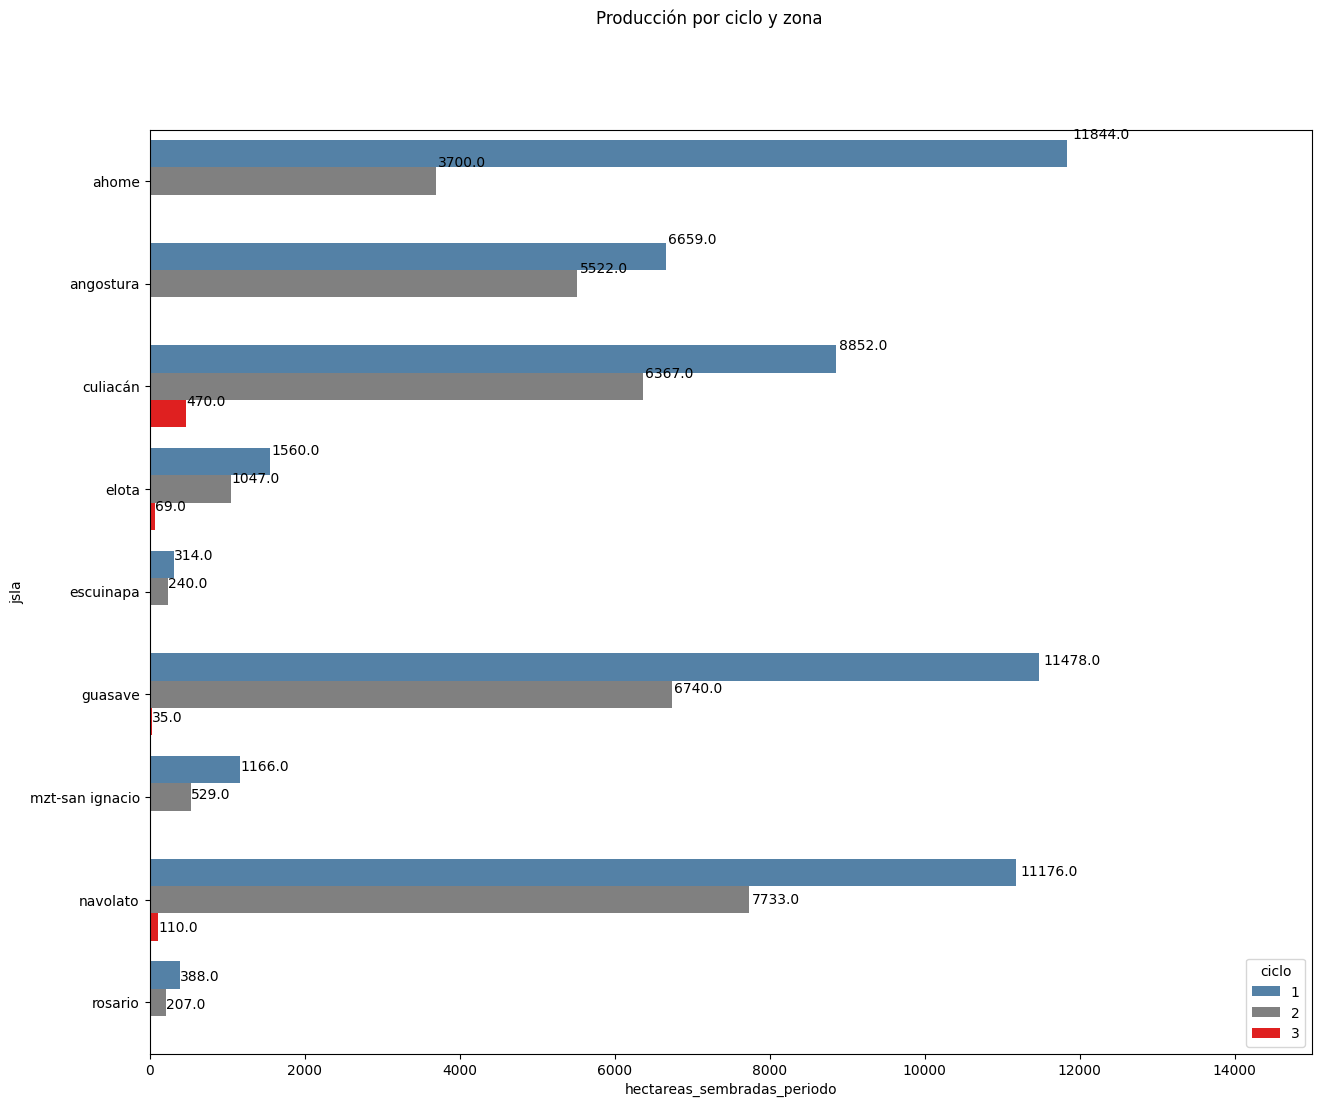

In [10]:
figure = plt.figure ( figsize = ( 15,12 ))

fig = sns.barplot ( ha_sembradas_2 , x = 'hectareas_sembradas_periodo'  , y = 'jsla' , hue = 'ciclo' , orient = 'h' , palette= ('steelblue' , 'grey' , 'red' ) )

for p in fig.patches :
    fig.annotate  ( str ( p.get_width()) , ( p.get_width() * 1.005 , p.get_y() * 1.025 ))

fig.legend ( loc = 'lower right' , title = 'ciclo')
figure.suptitle ( 'Producción por ciclo y zona ')
fig.set_xlim ( 0 , 15000 )

In [11]:
#Agrupar por region y ciclo

df2 = ha_sembradas_2.copy().drop ( columns = [ 'densidad' ] )

# df2= df2.groupby ( ['jsla' , 'ciclo'] ).sum().reset_index ()


df2

,ciclo,jsla,hectareas_sembradas_periodo,granjas_sembradas_preriodo,porcentaje_total_primer_ciclo,procentaje_resp_primer_ciclo_reg
0,1,ahome,11844.0,96,22.163632,100.000000
1,2,ahome,3700.0,36,6.923948,31.240132
2,1,angostura,6659.0,86,12.461291,100.000000
3,2,angostura,5522.0,70,10.333365,82.923709
4,1,culiacán,8852.0,324,16.564571,100.000000
5,2,culiacán,6367.0,250,11.915545,71.933919
6,3,culiacán,470.0,34,0.878605,5.304120
7,1,elota,1560.0,26,2.919887,100.000000
8,2,elota,1047.0,22,1.959878,67.121707
9,3,elota,69.0,3,0.129124,4.422226


In [12]:
pallete = sns.color_palette ('Blues')

pallete_2 = sns.color_palette ( 'Blues_r' )

pallete_3 = sns.color_palette ( 'GnBu' )

pallete_4 = sns.color_palette ( 'BuPu' )

In [40]:
def fc(x):
    """
    Formats an integer with commas as thousand separators.
    """
    return f"{x:,}"

#numeros de barras


def info_bars ( figure , n_space , fontsi = False , some_arg = False , weight = False ) : 

    if some_arg == False:
    
        some_arg = ''

    for p in figure.patches :

        if p.get_width () != 0 :
        
            figure.annotate  ( str ( fc ( int ( np.around( p.get_width() ) ) ) ) + some_arg , ( p.get_width() + n_space , p.get_y() * 1.0005  ) ,  fontsize = fontsi , horizontalalignment = 'center' , weight = weight )

def info_bars_v ( figure , n_space , fontsi = False , some_arg = False , x = False , weight = False ) : 

    if x == False :
        x = 1.0005

    if some_arg == False:
    
        some_arg = ''

    for p in figure.patches :

        if p.get_height() != 0 :
        
            figure.annotate  ( str ( fc (int ( np.around( p.get_height() ) ) ) ) + some_arg , ( p.get_x() + x  ,  p.get_height() + n_space ) , fontsize = fontsi , horizontalalignment = 'center' , weight = weight  )

def info_bars_op ( figure , figure_2 , n_space , fontsi = False , some_arg = False , x = False , weight = False ) : #vertical

    if x == False :
        x = 1.0005

    if some_arg == False:
    
        some_arg = ''

    for p,q in zip (figure_2.patches , figure.patches ) :

        if p.get_height() != 0 :

            # for q in figure.patches :

                # if p.get_height() != 0 :
        
                    figure.annotate  ( str ( fc (int ( np.around( p.get_height() ) ) ) ) + some_arg , ( p.get_x() + x ,  q.get_height() + n_space ) ,
                                       fontsize = fontsi , horizontalalignment = 'center' , weight = weight , color = 'steelblue' )



def truncate (x):

    return np.truncate ( x,0)


(1684986.287221629, 2583425.2531212247)

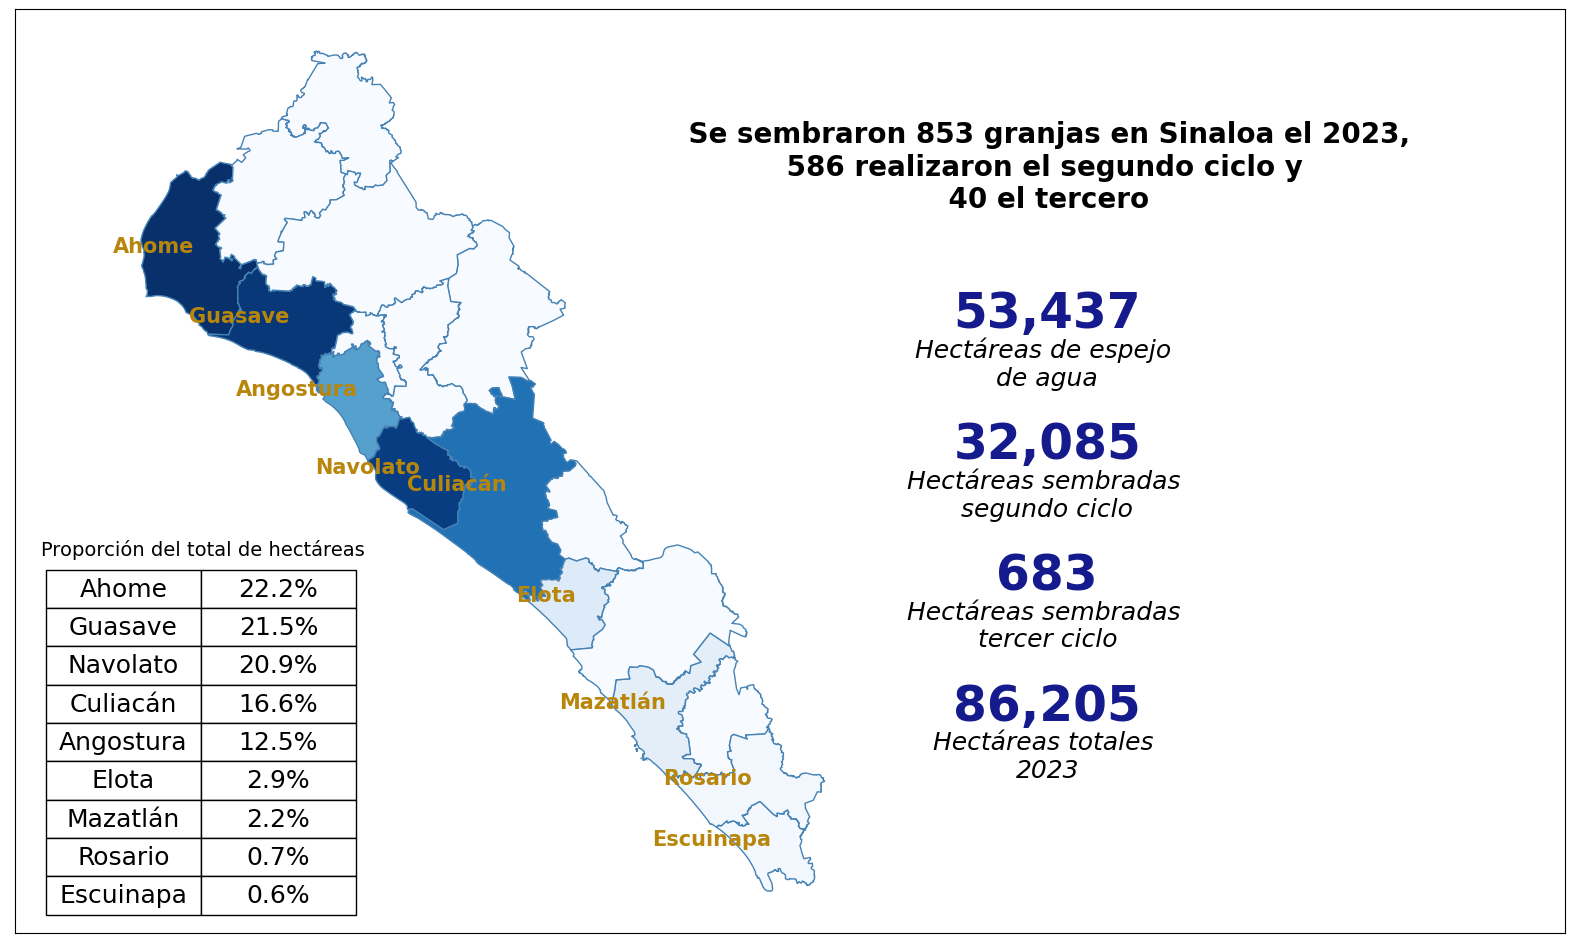

In [14]:
#Hectareas totales
prop = df2 [ [ 'ciclo' , 'jsla' , 'porcentaje_total_primer_ciclo' ] ].query ( ''' ciclo  ==  '1' ''').set_index ( 'jsla' ).drop ( columns= ( 'ciclo' ) ).sort_values ( 'porcentaje_total_primer_ciclo')


figure , axes = plt.subplots (  1 , 1 , figsize = ( 20 , 12 ) )


plog = tracts.join ( prop , 'jsla' ).fillna (0) # left_on = 'jsla' , right_on = 'jsla' )

plog [ 'porcentaje_total_primer_ciclo' ] = plog [ 'porcentaje_total_primer_ciclo' ].round(1)

plog['coords'] = plog['geometry'].apply(lambda x: x.centroid.coords[:])
plog['coords'] = [coords[0] for coords in plog['coords']]

map = plog.plot('porcentaje_total_primer_ciclo', edgecolor = 'steelblue',  cmap = 'Blues',  ax = axes   )#, #categorical = True )


for idx , row in  plog.iterrows () :

    if row [ 'porcentaje_total_primer_ciclo' ] != 0 :

        name = row [ 'NOMGEO'] #+ '\n' + str (  row [ 'porcentaje_total_primer_ciclo' ] ) + '%'
        map.annotate ( name ,
                        row [ 'coords' ]  , 
                        horizontalalignment='right', 
                        color = 'darkgoldenrod' , 
                        weight = 'bold', 
                        fontsize = 15
                        )
map.get_xaxis().set_visible(False)
map.get_yaxis().set_visible(False)

granjas_ciclo1 = ha_sembradas.query ( '''ciclo == '1' ''' ) [ 'granjas_sembradas_preriodo'] [ 0 ]
granjas_ciclo2 = ha_sembradas.query ( '''ciclo == '2' ''' ) [ 'granjas_sembradas_preriodo'] [ 1 ]
granjas_ciclo3 = ha_sembradas.query ( '''ciclo == '3' ''' ) [ 'granjas_sembradas_preriodo'] [ 2 ]

ha_ciclo1 = ha_sembradas.query ( '''ciclo == '1' ''' ) [ 'hectareas_sembradas_periodo'] [ 0 ]
ha_ciclo2 = ha_sembradas.query ( '''ciclo == '2' ''' ) [ 'hectareas_sembradas_periodo'] [ 1 ]
ha_ciclo3 = ha_sembradas.query ( '''ciclo == '3' ''' ) [ 'hectareas_sembradas_periodo'] [ 2 ]
ha_ciclot = ha_sembradas.query ( '''ciclo == 'total' ''' ) [ 'hectareas_sembradas_periodo'] [ 3 ]

txt_intro = f'''
    Se sembraron {granjas_ciclo1} granjas en Sinaloa el 2023,
    {granjas_ciclo2} realizaron el segundo ciclo y 
    {granjas_ciclo3} el tercero
    
'''
color_numbers = '#151B8D'
map.annotate ( txt_intro , ( 2273425.2531212247, 1543986.287221629 ) ,  horizontalalignment = 'center' , fontsize = 20 , weight = 'bold' )

#Hectareas primer ciclo label
map.annotate ( str ( fc(int ( ha_ciclo1 ))  ) , ( 2283425.2531212247, 1509986.287221629 ) , 
              horizontalalignment = 'center', fontsize = 35 , color = color_numbers , weight = 'bold'  )
map.annotate ( 'Hectáreas de espejo \nde agua' , ( 2283425.2531212247, 1474986.287221629 ) , horizontalalignment = 'center' , fontsize = 18 , style = 'italic' )
# map.annotate ( '(siembra del primer ciclo)' , ( 2283425.2531212247, 1490986.287221629 ) , horizontalalignment = 'center' , fontsize = 14 , style = 'italic' )

#Hectáreas segundo ciclo label
map.annotate ( str ( (fc (int ( ha_ciclo2 ) ) ) ) , ( 2283425.2531212247, 1429986.287221629 ) , 
              horizontalalignment = 'center', fontsize = 35 , color = color_numbers , weight = 'bold'  )
map.annotate ( 'Hectáreas sembradas \nsegundo ciclo' , ( 2283425.2531212247, 1394986.287221629 ) , horizontalalignment = 'center' , fontsize = 18 , style = 'italic' )

#Hectáreas sembradas 3 ciclo

map.annotate ( str ( fc ( int ( ha_ciclo3 ) ) ) , ( 2283425.2531212247, 1349986.287221629 ) , 
              horizontalalignment = 'center', fontsize = 35 , color = color_numbers , weight = 'bold'  )
map.annotate ( 'Hectáreas sembradas \ntercer ciclo' , ( 2283425.2531212247, 1314986.287221629 ) , horizontalalignment = 'center' , fontsize = 18 , style = 'italic' )

#Hectáreas totales

map.annotate ( str ( fc ( int ( ha_ciclot  ) ) ) , ( 2283425.2531212247, 1269986.287221629 ) , 
              horizontalalignment = 'center', fontsize = 35 , color = color_numbers , weight = 'bold'  )
map.annotate ( 'Hectáreas totales \n2023' , ( 2283425.2531212247, 1234986.287221629 ) , horizontalalignment = 'center' , fontsize = 18 , style = 'italic' )


#Table

map.annotate ( 'Proporción del total de hectáreas' , ( 1793821.8624098692 , 1370854.0398249433 ) , horizontalalignment = 'center' , fontsize = 14 )

info_table = plog [ [ 'NOMGEO' , 'porcentaje_total_primer_ciclo' ] ].query ( ''' porcentaje_total_primer_ciclo  > 0 ''' ).sort_values ( 'porcentaje_total_primer_ciclo' , ascending = False )
info_table [ 'porcentaje_total_primer_ciclo' ] = info_table [ 'porcentaje_total_primer_ciclo' ].astype (str) + '%'

table = axes.table ( cellText = info_table.values , loc = 'lower left' , cellLoc='center' ) #, rowColours =  )

table.scale ( .2, 2.3 )
table.set_fontsize ( 20 )
axes.axis('tight')

#Set figure xlim
axes.set_xlim ( 1684986.287221629 , 2583425.2531212247 )




In [15]:
ha_sembradas#.query ( '''ciclo == 'Total' ''' )# [ 'hectareas_sembradas_periodo']

,ciclo,hectareas_sembradas_periodo,granjas_sembradas_preriodo,porcentaje,porcentaje_primer_ciclo
0,1,53437.0,853,61.99,100.00
1,2,32085.0,586,37.22,60.04
2,3,683.0,40,0.79,1.28
3,total,86205.0,1479,100.00,161.32


In [16]:

#Hectareas sembradas por ciclo
ciclo  = df2[ ['ciclo' , 'jsla' , 'hectareas_sembradas_periodo' ] ].set_index ('jsla' ).pivot(columns=( 'ciclo' ))  

ciclo [ 'Total' ] = ciclo.sum ( axis= 1)

ciclo = ciclo [[ (                      'Total',  '') , ('hectareas_sembradas_periodo', '3') , ('hectareas_sembradas_periodo', '2') , ('hectareas_sembradas_periodo', '1') ]].sort_values ( (                       'Total',  '' )  , ascending= True )

ciclo [ 'Ciclo 2 vs Ciclo 1'   ] = ciclo [ ('hectareas_sembradas_periodo', '2') ] / ciclo [ ('hectareas_sembradas_periodo', '1') ] * 100

ciclo [ 'Ciclo 3 vs Ciclo 2' ] = ciclo [ ('hectareas_sembradas_periodo', '3') ] / ciclo [ ('hectareas_sembradas_periodo', '2') ] * 100

ciclo = ciclo.rename ( index= { 'escuinapa' : 'Escuinapa' , 'rosario' : 'Rosario' , 'mzt-san ignacio' : 'Mzt-SI' , 'elota' : 'Elota' , 'angostura' : 'Angostura' , 'ahome' : 'Ahome' , 'culiacán' : 'Culiacán' ,
                       'guasave' : 'Guasave' , 'navolato' : 'Navolato'
                       })

#Fig 2 plot df

fig_2_df = ciclo [ [ 'Ciclo 3 vs Ciclo 2' , 'Ciclo 2 vs Ciclo 1'   ] ].query ( '''index in ( 'Guasave' , 'Ahome' , 'Navolato' , 'Culiacán' , 'Angostura' ) ''' ).sort_values ( 'Ciclo 2 vs Ciclo 1' ).fillna(0)

fig_2a_df = ciclo [ [ 'Ciclo 3 vs Ciclo 2' , 'Ciclo 2 vs Ciclo 1'  ] ].query ( '''index not in ( 'Guasave' , 'Ahome' , 'Navolato' , 'Culiacán' , 'Angostura' ) ''' ).sort_values ( 'Ciclo 2 vs Ciclo 1' ).fillna(0)



Text(94, 3, 'C)')

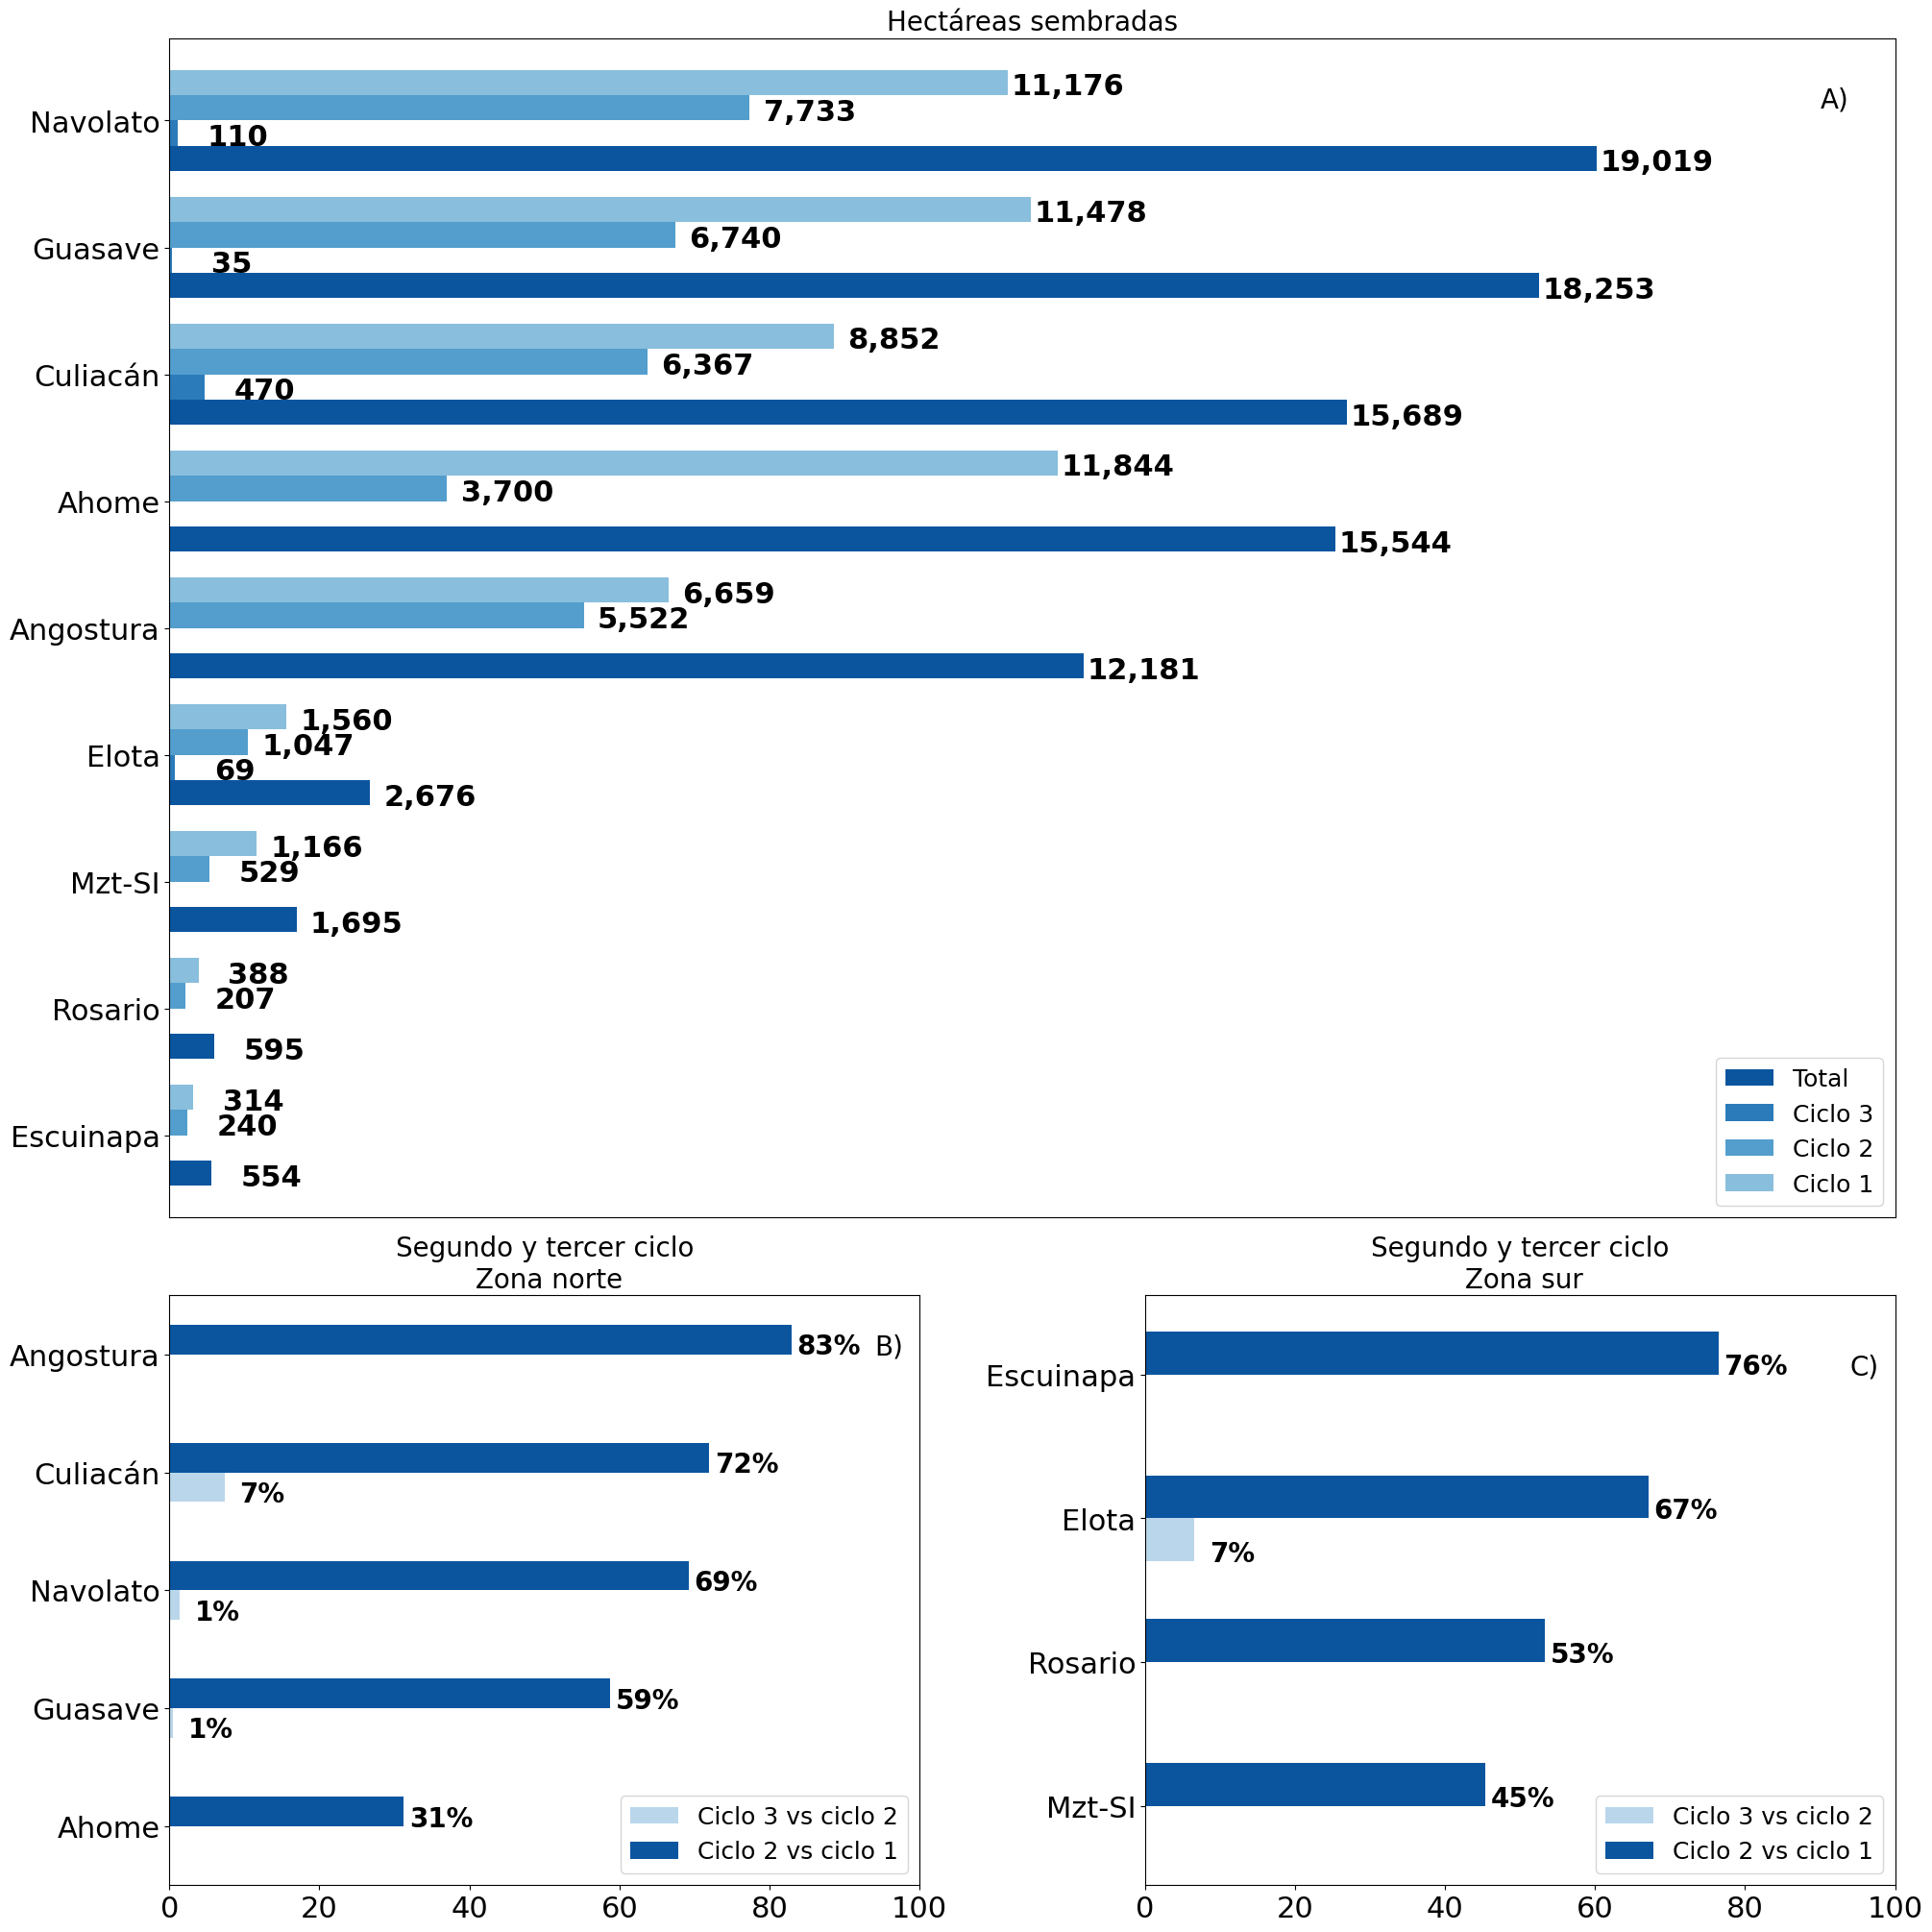

In [46]:
figure_5 = plt.figure ( layout="constrained" , figsize= ( 20 , 20) )

# from matplotlib.gridspec import GridSpec

gs = GridSpec ( 3 , 2 , figure = figure_5   )

ax1 = figure_5.add_subplot(gs[0:2, : ])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))

ax2 = figure_5.add_subplot(gs[2, :-1])
ax3 = figure_5.add_subplot(gs[2:, -1])



fig = ciclo.drop ( columns = [(         'Ciclo 2 vs Ciclo 1',  ''), (         'Ciclo 3 vs Ciclo 2',  '')] ).plot.barh ( color= pallete_2  , xlabel = '' , fontsize = 22 , ax = ax1 , width = 0.8 )
ax1.set_title ( 'Hectáreas sembradas' )
ax1.title.set_size (20)
info_bars (fig, 800 , 22 , weight = 'bold' )
fig.set_xlim ( 0, 23000)
# fig.set_ylim ( 0 , 9.2 )
fig.legend   ( [ 'Total' , 'Ciclo 3' , 'Ciclo 2' , 'Ciclo 1'  ] ,  loc = 'lower right' , title = False , fontsize = 18 )
fig.get_xaxis().set_visible(False)
# fig.annotate ( 'Hectáreas sembradas' , (27000/2, 8.5 ) , fontsize = 16 , horizontalalignment = 'center' )

# figure_2 , axes_2 =  plt.subplots ( 1 , 2 , figsize  = ( 24 , 8 )  )

fig_2 = fig_2_df.plot.barh ( ax = ax2 , color =  pallete [ 1:2 ] + [pallete_2 [0]] ,  fontsize = 22 , xlabel = '', width = 0.5 )
ax2.set_title ( 'Segundo y tercer ciclo\n Zona norte' )
ax2.title.set_size (20)
info_bars (fig_2 , 5 ,  20 , '%' , weight = 'bold' )
fig_2.legend ( [ 'Ciclo 3 vs ciclo 2' , 'Ciclo 2 vs ciclo 1' ] ,  title = False , loc = 'lower right' , fontsize = 18 )
fig_2.set_xlim ( 0 , 100 )

fig_2a = fig_2a_df.plot.barh ( ax = ax3 , color = pallete [ 1:2 ] + [pallete_2 [0]] , title = 'Zona centro/sur' , fontsize = 22 , xlabel = '' , width = 0.6 )
ax3.set_title ( 'Segundo y tercer ciclo\n Zona sur' )
ax3.title.set_size (20)
info_bars (fig_2a , 5 , 20 , '%' , weight = 'bold' )
fig_2a.legend ( [ 'Ciclo 3 vs ciclo 2' , 'Ciclo 2 vs ciclo 1' ] ,  title = False , loc = 'lower right' , fontsize = 18 )
fig_2a.set_xlim ( 0 , 100 )

#Indice figuras
ax1.annotate ( 'A)' , ( 22000 , 8.1 ) , fontsize = 20 )
ax2.annotate ( 'B)' , ( 94 , 4 ) , fontsize = 20 )
ax3.annotate ( 'C)' , ( 94 , 3 ) , fontsize = 20 )

A través del tiempo

In [18]:
time_line = semi_siembra [ [ 'Fecha de actualización' , 'jsla' , 'ciclo' , 'hectareas_sembradas_periodo' , 'granjas_sembradas_preriodo' , 'densidad' ] ]

time_line [ 'mes' ] = pd.DatetimeIndex ( semi_siembra [ 'Fecha de actualización'] ).month

time_line

C:\Users\aldou\AppData\Local\Temp\ipykernel_22280\2190830121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_line [ 'mes' ] = pd.DatetimeIndex ( semi_siembra [ 'Fecha de actualización'] ).month


,Fecha de actualización,jsla,ciclo,hectareas_sembradas_periodo,granjas_sembradas_preriodo,densidad,mes
0,2023-03-15 00:00:00,guasave,1,442.32,7,11,3
1,2023-03-15 00:00:00,guasave,1,595.10,6,10,3
2,2023-03-15 00:00:00,angostura,1,3196.46,38,11,3
3,2023-03-15 00:00:00,navolato,1,2058.30,25,10,3
4,2023-03-15 00:00:00,navolato,1,2571.72,31,11,3
...,...,...,...,...,...,...,...
539,2023-11-08 00:00:00,guasave,3,0.00,0,10,11
540,2023-11-08 00:00:00,navolato,3,0.00,0,8,11
541,2023-11-08 00:00:00,culiacán,3,0.00,0,8,11
542,2023-11-08 00:00:00,culiacán,3,5.00,1,7,11


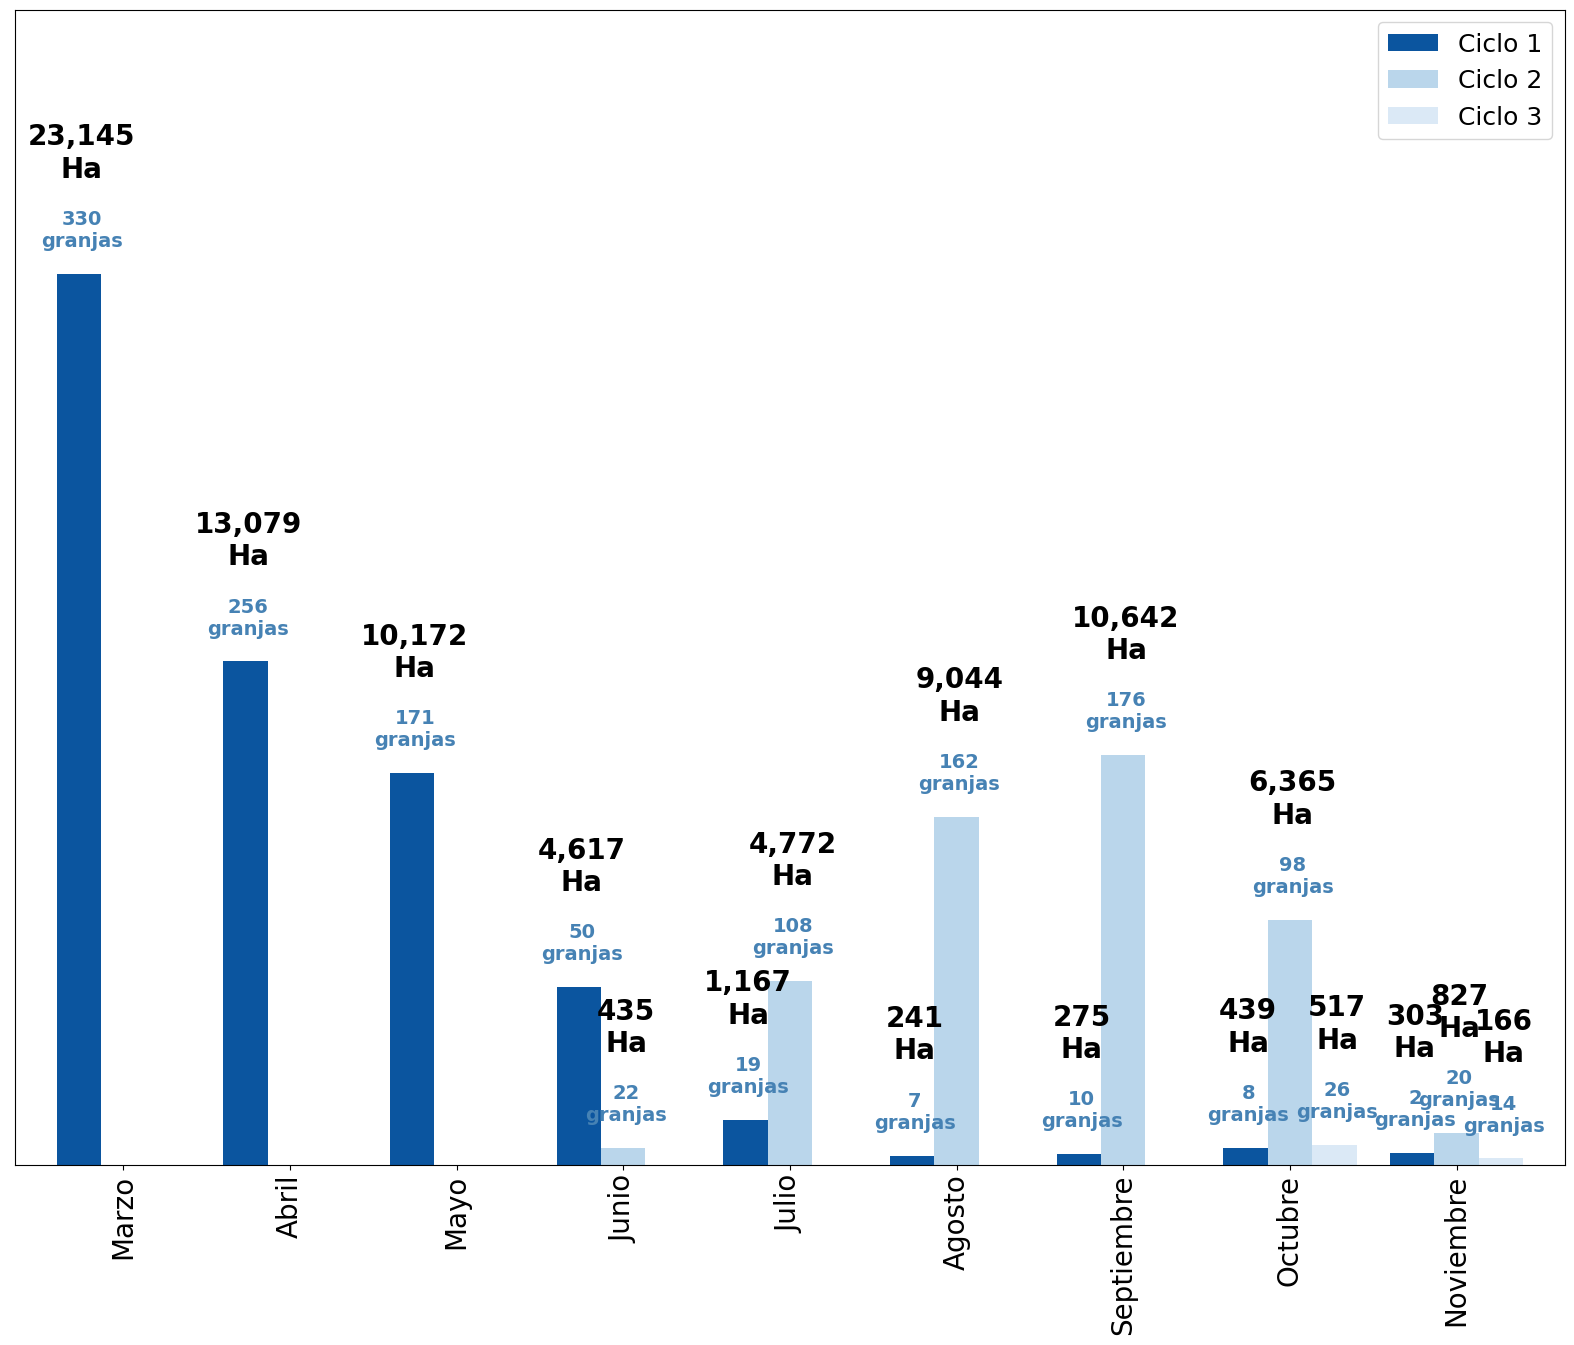

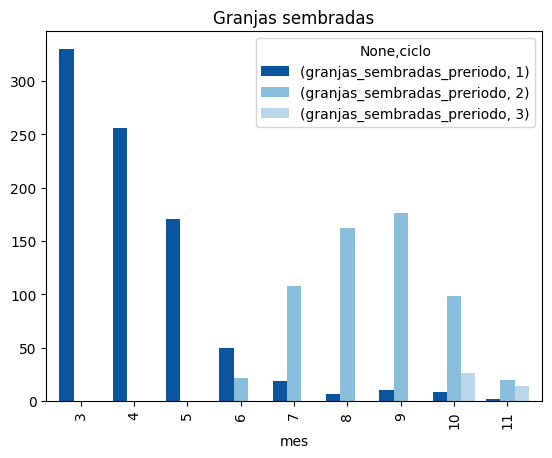

In [48]:
siembra_mensual = time_line.groupby ( [ 'mes' ,  'ciclo' ] ).sum().reset_index ().set_index ('mes')#.rename ( 
    # index = { 3 : 'Marzo' , 4 : 'Abril' , 5 : 'Mayo' , 6 : 'Junio' , 7 : 'Julio' , 8 : 'Agosto' , 9 : 'Septiembre' , 10 : 'Octubre' , 11 : 'Noviembre' } ).sort_index (  'Marzo' , 'Abril' , 'Mayo' , 'Junio' , 'Julio' , 'Agosto' , 'Septiembre' , 'Octubre' , 'Noviembre' )

figure_3 , axes_3 = plt.subplots ( 1 , 1 , figsize = ( 20 , 15 ) )

# figure_3.suptitle ( 'Siembra total por periodo' )

x = 0.15

fig_3 = siembra_mensual [ [ 'ciclo' , 'hectareas_sembradas_periodo' ] ].pivot ( columns = ('ciclo') ).plot.bar ( color= [pallete_2 [0] ] + [pallete [ 1 ] ] + [pallete_2 [ -1 ]] ,
                                                                                                                  ax = axes_3  ,
                                                                                                                  width = .8 , linewidth=1 ,
                                                                                                                  xlabel = '' ,
                                                                                                                  fontsize = 20 ,
                                                                                                                  )#figsize = ( 12, 8 ) )
fig_3.legend ( [ 'Ciclo 1' , 'Ciclo 2' , 'Ciclo 3' ] , title = False , fontsize = 18  )
fig_3.set_ylim ( 0 , 30000)
info_bars_v ( fig_3 , 2500 , 20 , some_arg= '\nHa' ,  x = x , weight = 'bold' )
fig_3.set_xticklabels ( ['Marzo' , 'Abril' , 'Mayo' , 'Junio' , 'Julio' , 'Agosto' , 'Septiembre' , 'Octubre' , 'Noviembre' ] )
fig_3.get_yaxis().set_visible(False)
# fig_3.get_xlabel().set_visible(False)


fig_3a = siembra_mensual [ [ 'ciclo' , 'granjas_sembradas_preriodo' ] ].pivot ( columns = ('ciclo') ).plot.bar ( color= [pallete_2 [0] ] + [pallete_2 [ 3 ] ] + [pallete_2 [ 4 ]] , 
                                                                                                                title = 'Granjas sembradas',
                                                                                                                  width = .8  , linewidth=1 ) # figsize = ( 12, 8 ) )
# fig_3a.legend ( [ 'Ciclo 1' , 'Ciclo 2' , 'Ciclo 3' ] , title = False  )
# info_bars_v ( fig_3a , 10 , 8)
# fig_3a.set_ylim ( 0 , 425 )

info_bars_op ( fig_3 , fig_3a , 700 , 14 , some_arg= '\ngranjas' , x = x , weight = 'bold' )

In [20]:
siembra_mensual.rename ( index = { 3 : 'Marzo' , 4 : 'Abril' , 5 : 'Mayo' , 6 : 'Junio' , 7 : 'Julio' , 8 : 'Agosto' , 9 : 'Septiembre' , 10 : 'Octubre' , 11 : 'Noviembre' } )

,ciclo,hectareas_sembradas_periodo,granjas_sembradas_preriodo,densidad
mes,,,,
Marzo,1,23145.11,330,357
Abril,1,13079.14,256,513
Mayo,1,10171.90,171,388
Junio,1,4616.73,50,524
Junio,2,435.20,22,71
Julio,1,1166.73,19,264
Julio,2,4771.94,108,186
Agosto,1,240.87,7,528
Agosto,2,9043.96,162,505


In [21]:
siembra_mensual [ 'ha_granja' ] = siembra_mensual [ 'hectareas_sembradas_periodo' ] / siembra_mensual [ 'granjas_sembradas_preriodo' ]

siembra_mensual.ha_granja.mean().round(2) , siembra_mensual.ha_granja.std().round(2) , siembra_mensual.ha_granja.max().round(2) , siembra_mensual.ha_granja.min().round(2)

(54.18, 32.55, 151.5, 11.89)

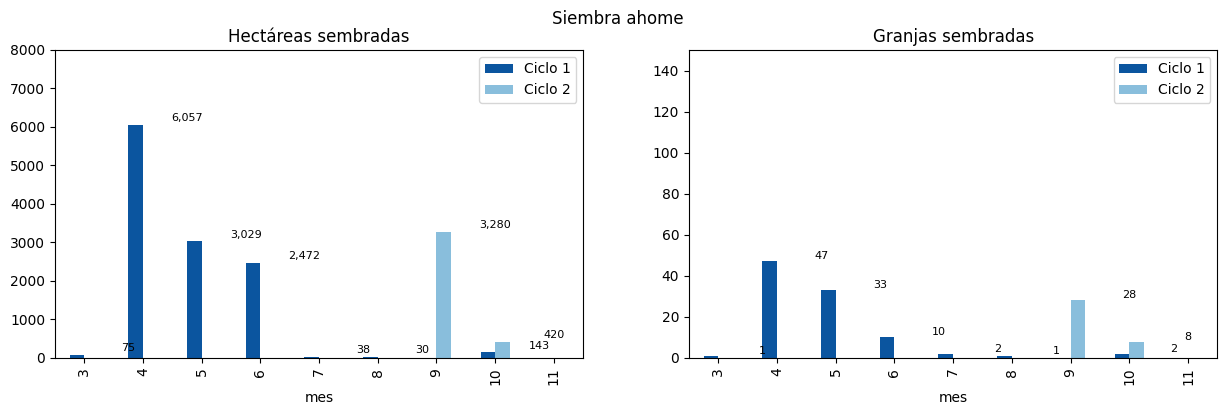

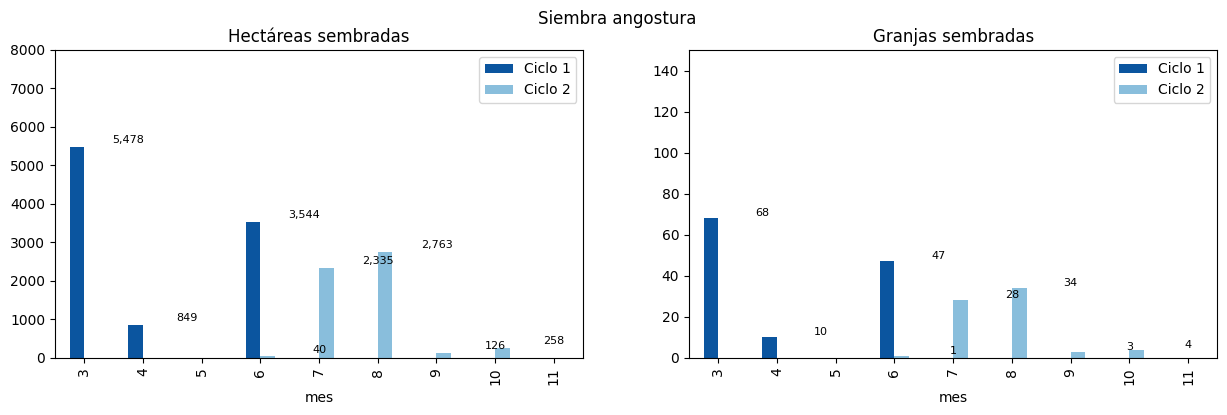

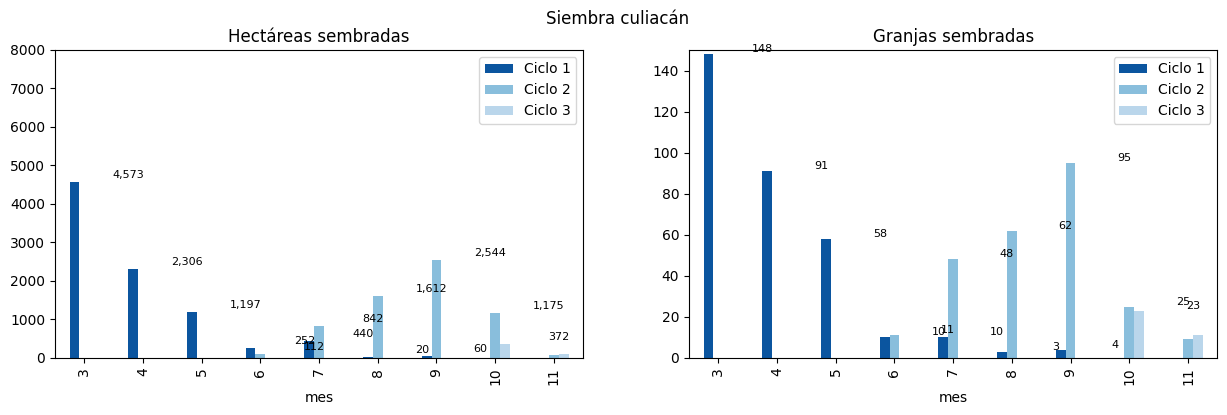

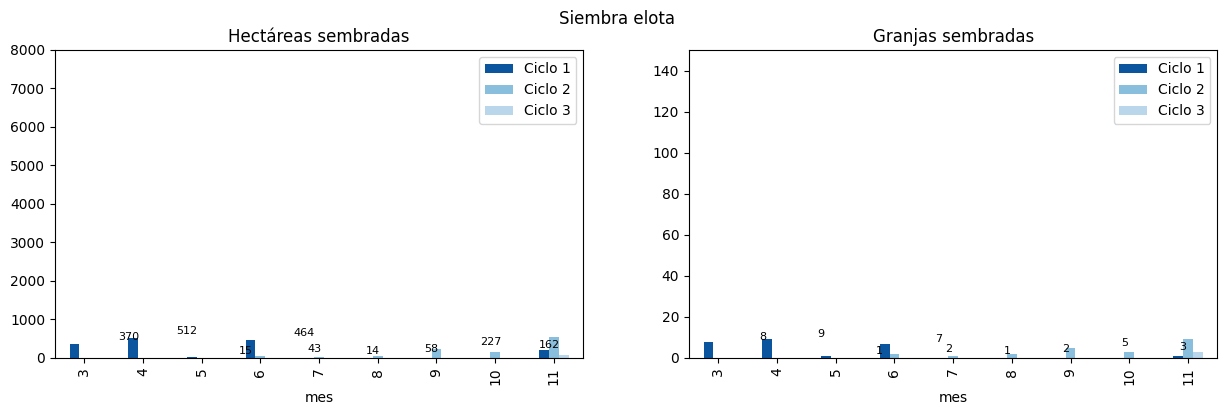

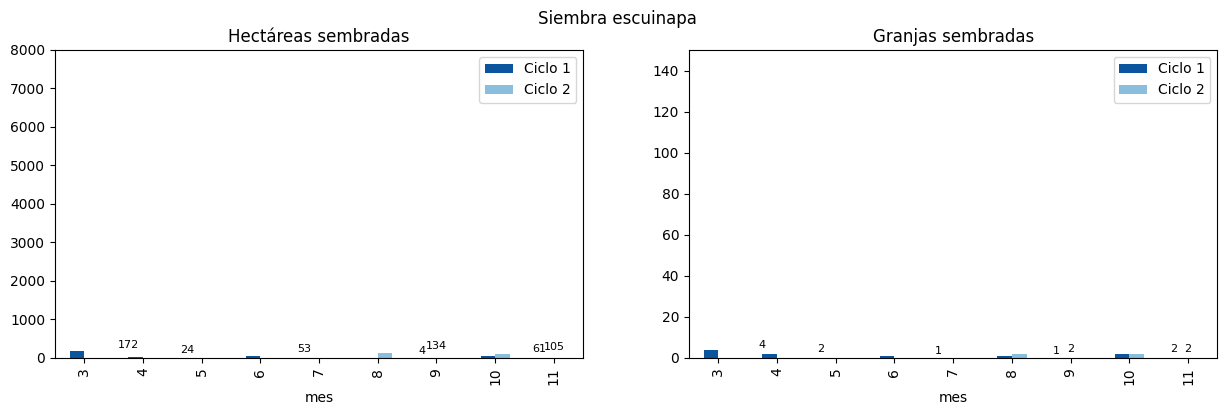

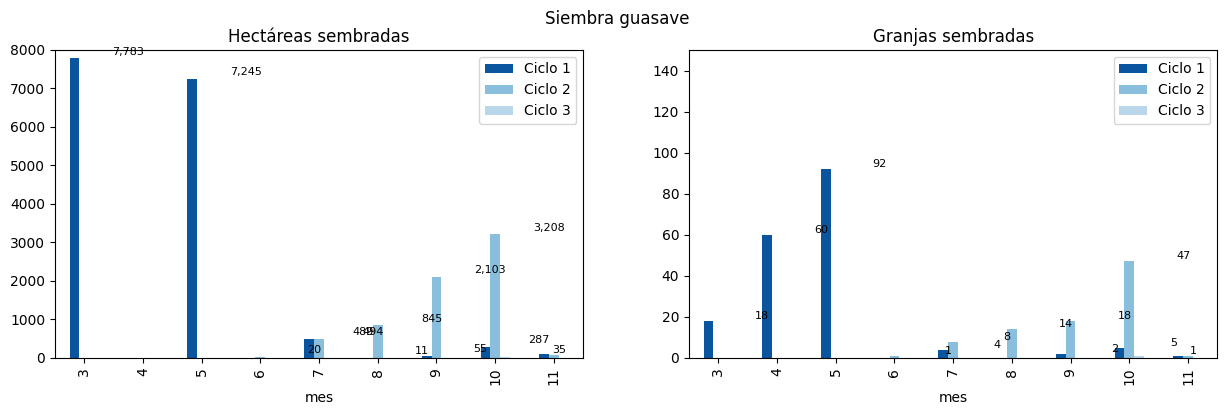

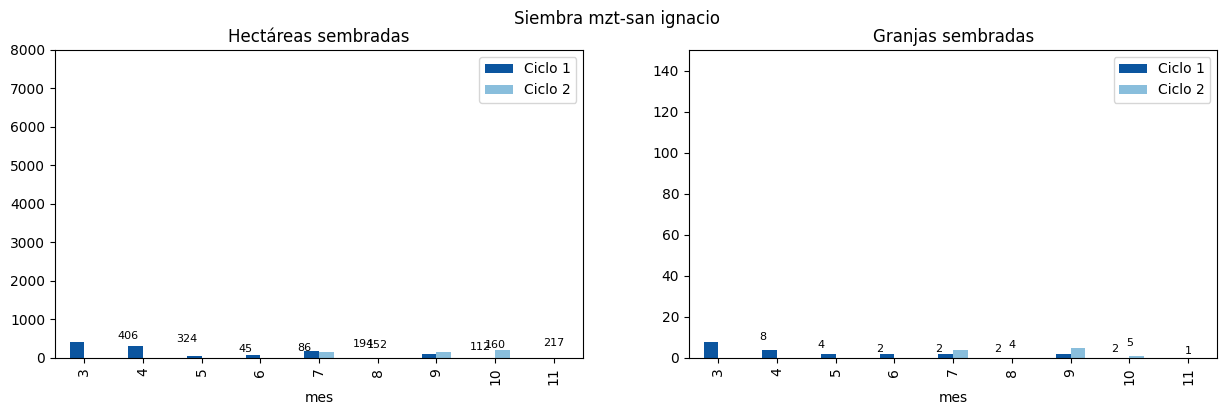

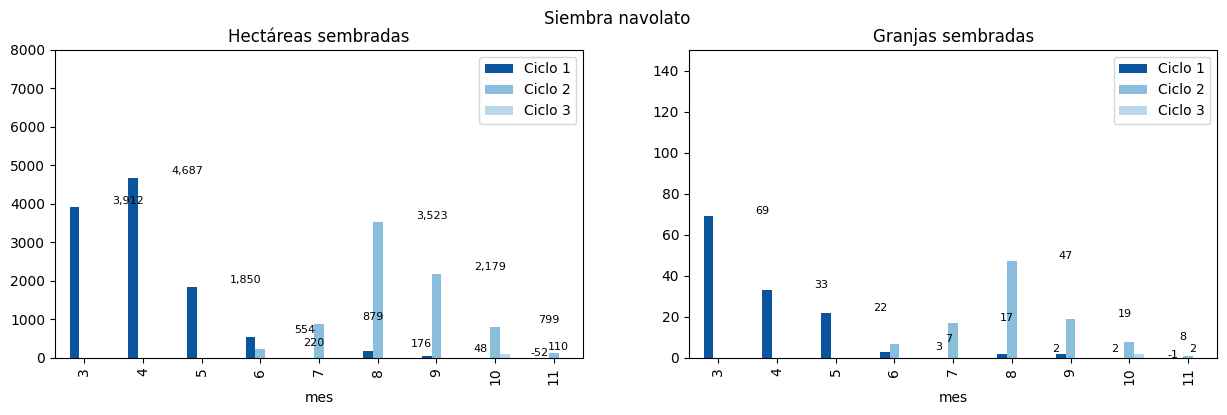

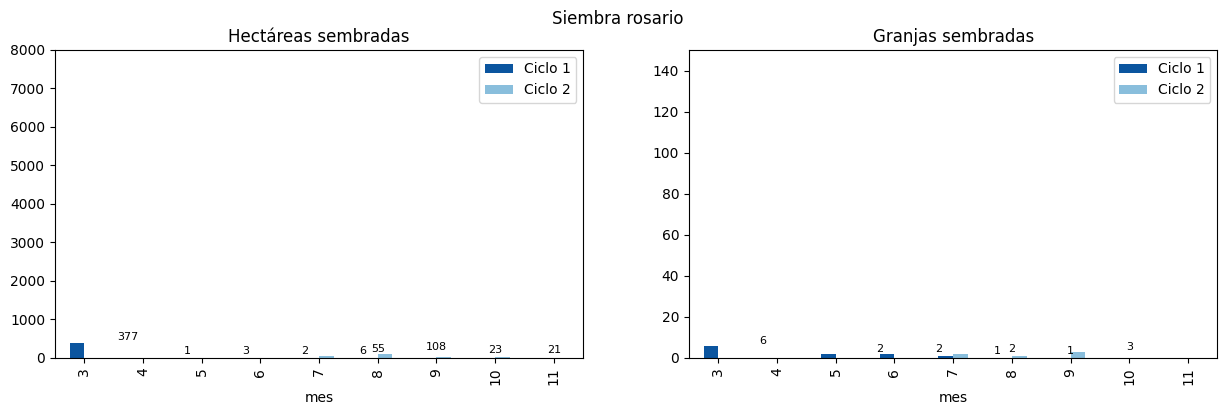

In [22]:
siembra_region = time_line  [ [ 'mes' , 'jsla' , 'ciclo' , 'hectareas_sembradas_periodo' , 'granjas_sembradas_preriodo'  ] ].groupby ( [ 'mes' , 'ciclo' , 'jsla'  ] ).sum().reset_index().set_index ( 'mes' )

# siembra_region 



lista_regiones = siembra_region.jsla.unique().tolist ()

for i in lista_regiones :

    figure_4 , axes_4 = plt.subplots ( 1 , 2 , figsize = ( 15 , 4 ))

    figure_4.suptitle ( f'Siembra {i}')

    fig_4_i = siembra_region.query ( ''' jsla == '{}' '''.format (i) )

    fig_4 = fig_4_i [ [ 'hectareas_sembradas_periodo' , 'ciclo' ] ].pivot ( columns = ('ciclo') ).plot.bar ( ax = axes_4 [ 0 ] , color = [pallete_2 [0] ] + [pallete_2 [ 3 ] ] + [pallete_2 [ 4 ]] , title =  'Hectáreas sembradas' )
    fig_4.legend ( ['Ciclo 1' , 'Ciclo 2' , 'Ciclo 3'] , title = False)
    fig_4.set_ylim ( 0 , 8000 )
    info_bars_v ( fig_4 , 100 , 8)

    fig_4a = fig_4_i [ [ 'granjas_sembradas_preriodo' , 'ciclo' ] ].pivot ( columns =  ('ciclo') ).plot.bar ( ax = axes_4 [ 1 ] , color = [pallete_2 [0] ] + [pallete_2 [ 3 ] ] + [pallete_2 [ 4 ]] , title = 'Granjas sembradas' )
    fig_4a.set_ylim ( 0 , 150)
    fig_4a.legend ( ['Ciclo 1' , 'Ciclo 2' , 'Ciclo 3'] , title = False)
    info_bars_v ( fig_4a , 1 , 8 )




**Fror

In [23]:
def ob_param_1 ( jsla , parametro ) : 

    return ha_sembradas_2.query ( ''' jsla == '{}' and ciclo == '1' '''.format ( jsla ) )[ parametro ].reset_index ( drop = True ).loc[0]

def map_region ( region ) :
    
    return tracts.query ( ''' NOMGEO == '{}' '''.format ( region ))#.plot()

def param_cosecha ( jsla , parame  ) :

    return  str ( cosecha.query ( ''' jsla == '{}' and {} != 0 '''.format ( jsla , parame ) ) [ parame ].median().round (2) ) + ' ± ' + str ( cosecha.query ( ''' jsla == '{}' and {} != 0 '''.format ( jsla, parame) )[ parame ].std().round (2) )

class Datos_region :

    def __init__ ( self ,  nomgeom , jsla ) : 

        self.region = jsla

        self.map = map_region ( nomgeom )

        self.hectáreas =  fc ( int ( ob_param_1 ( jsla , 'hectareas_sembradas_periodo' ) ) )

        self.granjas = str ( int ( ob_param_1 ( jsla , 'granjas_sembradas_preriodo' ) ) )

        self.densidad =  str ( int ( semi_siembra.query ( ''' jsla == '{}' '''.format ( jsla ) ).densidad.mean ( ).round (0) ) ) + ' ± ' + str ( int ( semi_siembra.query ( ''' jsla == '{}' '''.format (jsla) ).densidad.std ( ).round (0) ) )

        self.fca = param_cosecha ( jsla , 'fca' )

        self.kg_ha = param_cosecha ( jsla , 'kg_ha' )

        self.peso = param_cosecha ( jsla , 'peso' )

        self.sobrevivencia = param_cosecha ( jsla , 'sobrevivencia' )

    def plots  ( self ) :

        figure_6 = plt.figure ( layout="constrained" , figsize= (12,8)  )

        # from matplotlib.gridspec import GridSpec

        gs_2 = GridSpec ( 3 , 4 , figure = figure_6   )

        ax_1 = figure_6.add_subplot(gs_2[ :  , : 2  ])
        ax_2 = figure_6.add_subplot(gs_2[ 0 ,  2: ])
        ax_3 = figure_6.add_subplot(gs_2[ 1 : ,  2: ])

        def sin_bordes ( ax ) :#quita ejes y marco
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            ax.axis('off')

        sin_bordes (ax_1)
        sin_bordes (ax_2)

        #mapa
        tracts.plot ( ax = ax_1 , color = 'white' , edgecolor = '#1569C7' )
        self.map.plot ( ax = ax_1 , color = 'steelblue'  , edgecolor = '#123456' ) #color_numbers )  # , cmap = 'Blues' )


        #Datos

        x1 = 0.2
        x2 = x1 + .33
        x3 = x2 + .3

        y1 = .7
        y2 = y1 - .3
        y3 = y2 - .3

        y4 = y1 + .1
        y5 = y2 + .1
        y6 = y3+.1

        color_etiquete = '#1569C7'
        ax_2.annotate ( 'Ha de espejo de agua' , ( x1 , y1  ) ,  horizontalalignment = 'center' , fontsize = 10 , style = 'italic' , color = color_etiquete )
        ax_2.annotate ( 'Granjas sembradas' , ( x2 , y1 ) ,  horizontalalignment = 'center' , fontsize = 10 , style = 'italic' , color = color_etiquete )
        ax_2.annotate ( 'Densidad de siembra' , ( x3 , y1  ) ,  horizontalalignment = 'center' , fontsize = 10 , style = 'italic' , color = color_etiquete )

        ax_2.annotate ( 'kilogramos / hectárea' , ( x1 , y2 ) ,  horizontalalignment = 'center' , fontsize = 10 , style = 'italic' , color = color_etiquete )
        ax_2.annotate ( 'Peso de cosecha' , ( x2 , y2  ) ,  horizontalalignment = 'center' , fontsize = 10 , style = 'italic' , color = color_etiquete )
        ax_2.annotate ( 'FCA' , ( x3 , y2  ) ,  horizontalalignment = 'center' , fontsize = 10 , style = 'italic' , color = color_etiquete )

        ax_2.annotate ( 'Sobrevivencia' , ( x2 , y3 ) ,  horizontalalignment = 'center' , fontsize = 10 , style = 'italic' , color = color_etiquete )

        ax_2.annotate ( self.hectáreas , ( x1 , y4 ) ,  horizontalalignment = 'center' , fontsize = 16 , weight = 'bold' )
        ax_2.annotate ( self.granjas , ( x2 , y4  ) ,  horizontalalignment = 'center' , fontsize = 16 , weight = 'bold'  )
        ax_2.annotate ( self.densidad , ( x3 , y4 ) ,  horizontalalignment = 'center' , fontsize = 16 , weight = 'bold'  )

        ax_2.annotate ( self.kg_ha , (x1 , y5 ) ,  horizontalalignment = 'center' , fontsize = 16 , weight = 'bold'  )
        ax_2.annotate ( self.peso , ( x2 , y5 ) ,  horizontalalignment = 'center' , fontsize = 16 , weight = 'bold'  )
        ax_2.annotate ( self.fca , ( x3 , y5  ) ,  horizontalalignment = 'center' , fontsize = 16 , weight = 'bold'  )

        ax_2.annotate ( self.sobrevivencia , ( x2 , y6 ) ,  horizontalalignment = 'center' , fontsize = 16 , weight = 'bold'  )
        #Siembras 
        # regi = 'ahome'
        fig_4_i = siembra_region.query ( ''' jsla == '{}' '''.format ( self.region ) )

        fig_4 = fig_4_i [ [ 'hectareas_sembradas_periodo' , 'ciclo' ] ].pivot ( columns = ('ciclo') ).plot.bar ( ax = ax_3 , color = [pallete_2 [0] ] + [pallete_2 [ 3 ] ] + [pallete_2 [ 4 ]] , 
                                                                                                                title =  'Hectáreas sembradas' , xlabel = ''  )
        fig_4.legend ( ['Ciclo 1' , 'Ciclo 2' , 'Ciclo 3'] , title = False, fontsize = 16 )
        fig_4.set_ylim ( 0 , 8500 )
        info_bars_v ( fig_4 , 100 , 14 , x = .1)
        ax_3.title.set_size (15)
        ax_3.set_xticklabels ( ['Marzo' , 'Abril' , 'Mayo' , 'Junio' , 'Julio' , 'Agosto' , 'Septiembre' , 'Octubre' , 'Noviembre' ] )



Ahome

In [24]:
#Ahome
#Hectáreas sembradas
#Número de granjas
#Densidad de siembra
#Peso de cosecha
#kg/Ha
#FCA
#Perfil de siembras

ahome = Datos_region ( 'Ahome' , 'ahome' )
guasave = Datos_region ( 'Guasave' , 'guasave' )
navolato = Datos_region ( 'Navolato' , 'navolato' )
culiacan = Datos_region ( 'Culiacán' , 'culiacán' )
angostura = Datos_region ( 'Angostura' , 'angostura' )

# escuinapa = Datos_region ( 'Escuinapa' , 'escuinapa' )
# elota = Datos_region 



(None, None, None, None, None)

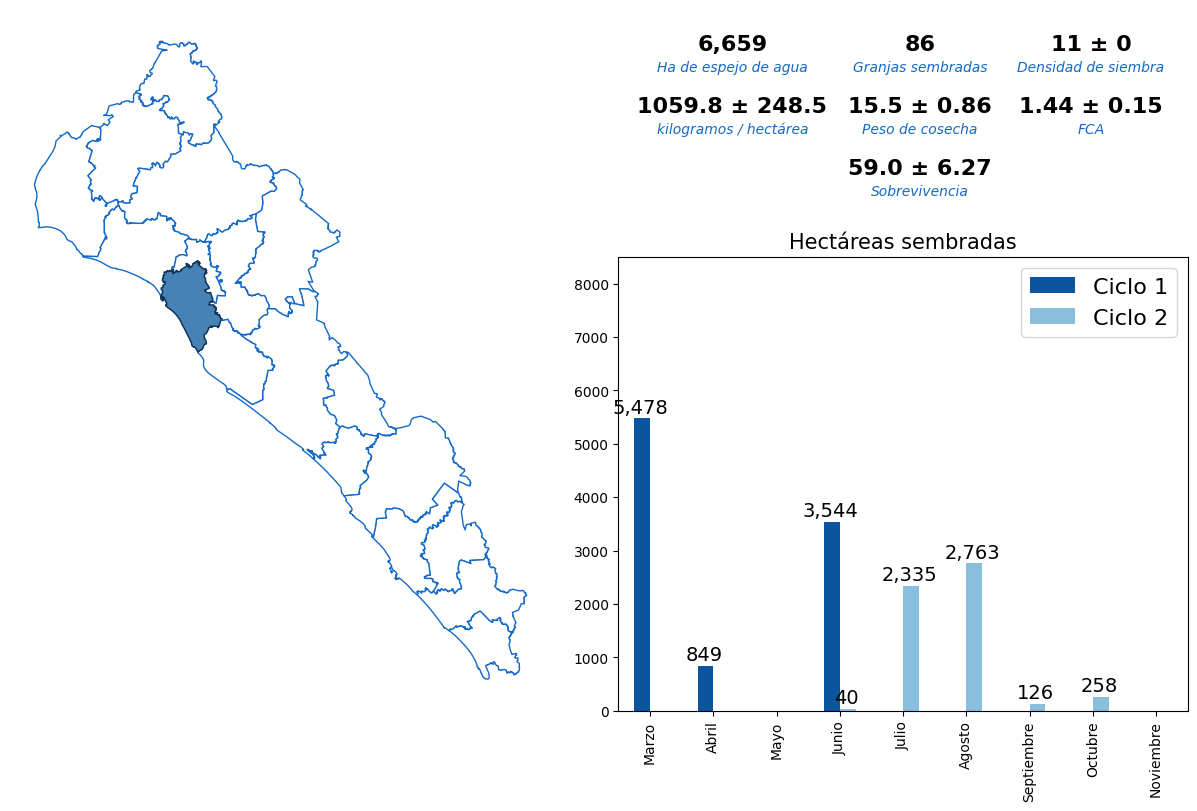

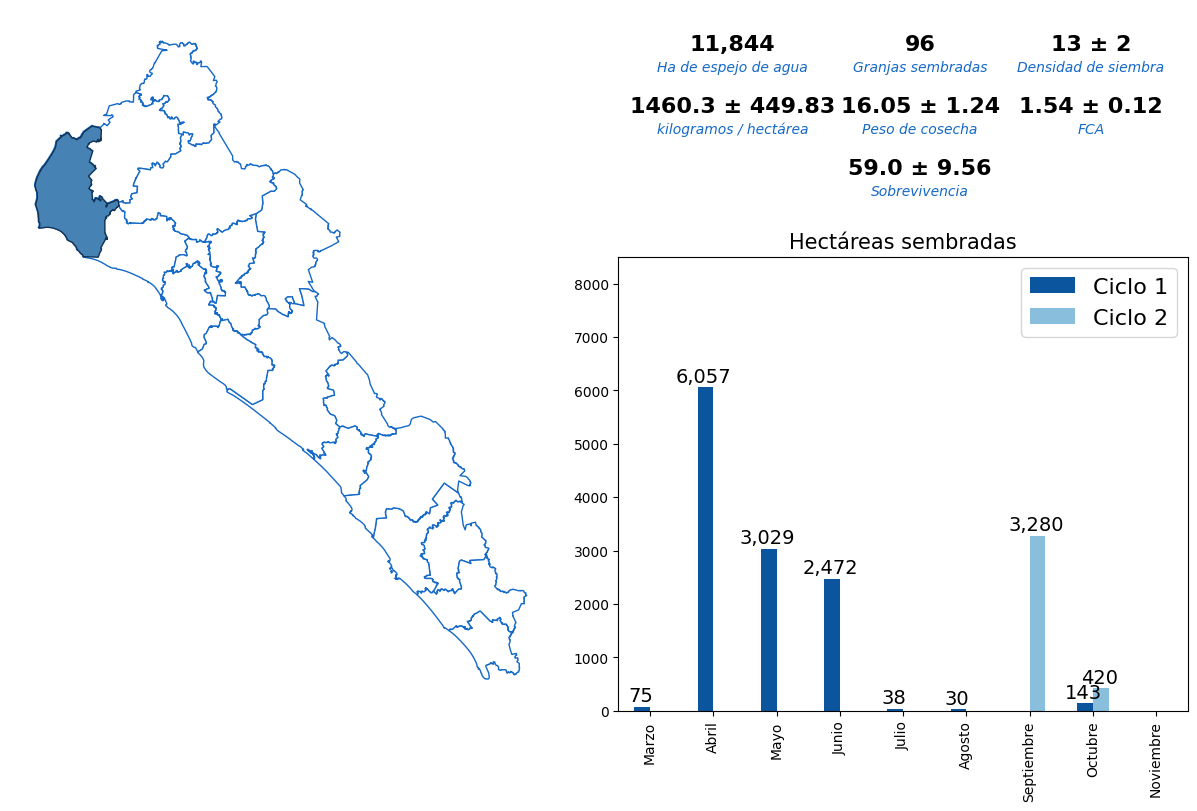

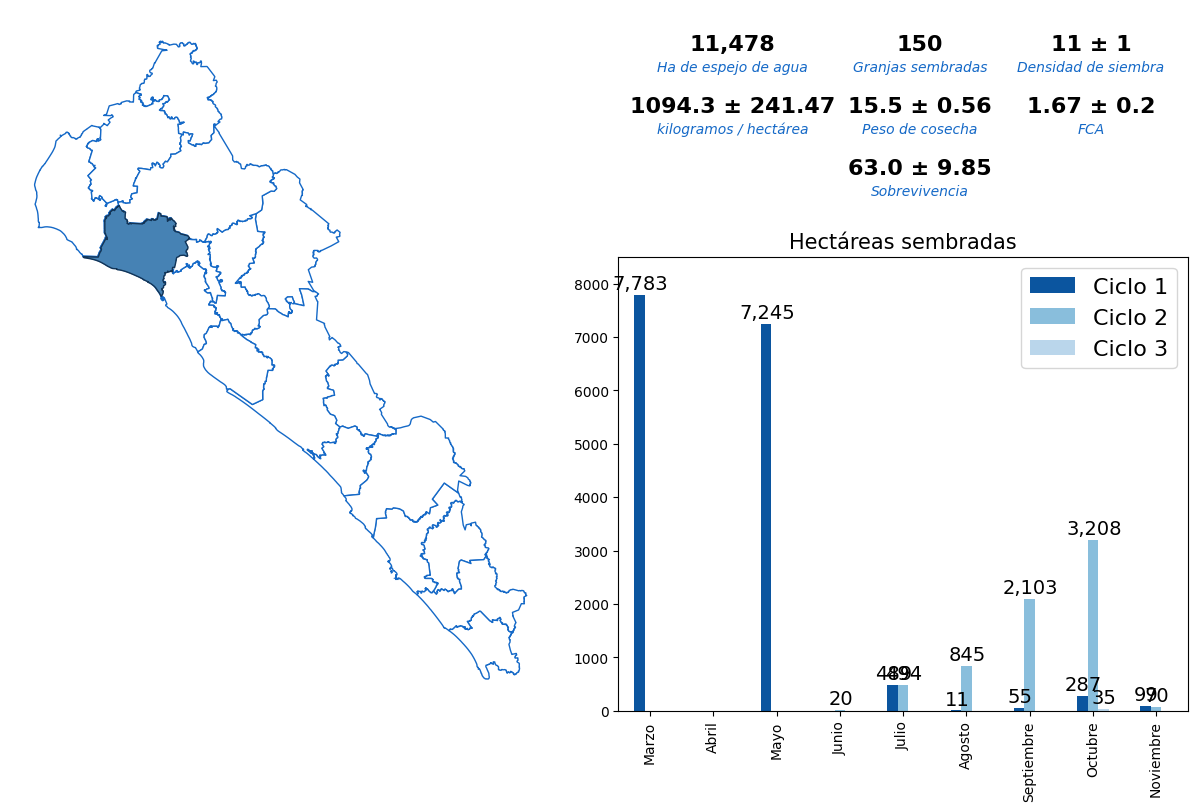

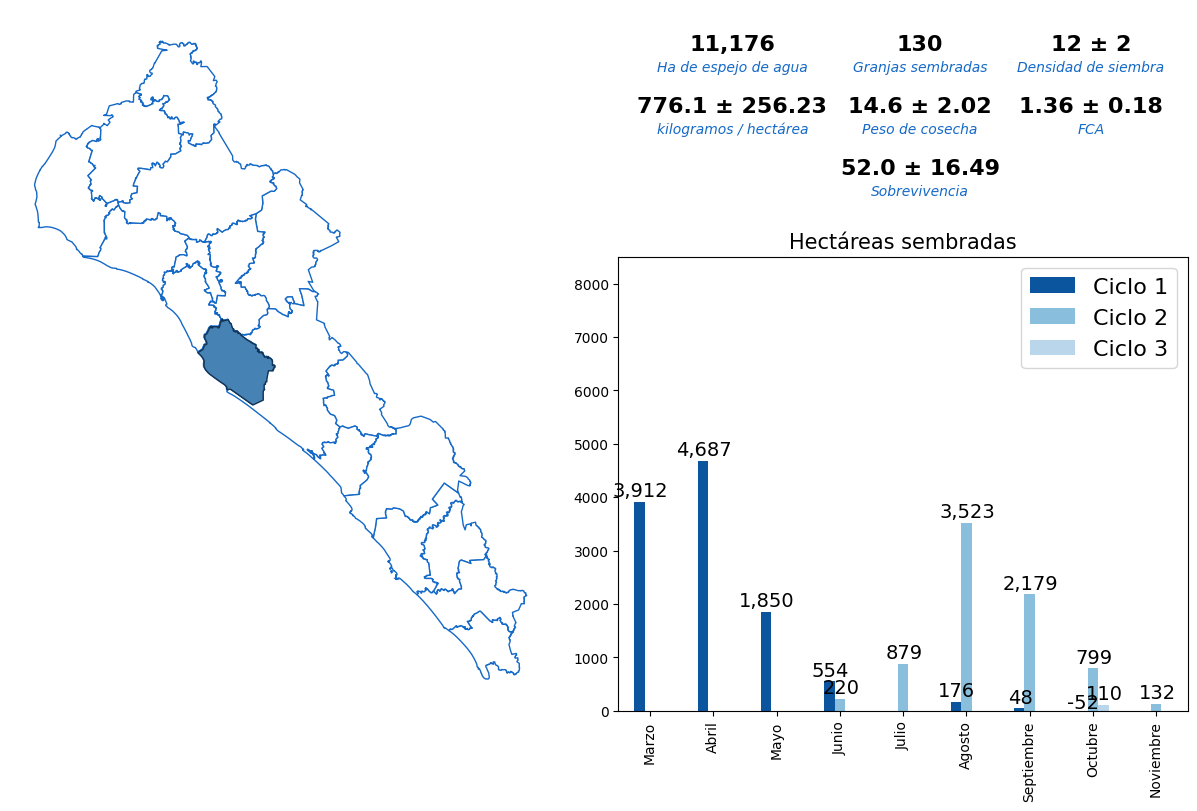

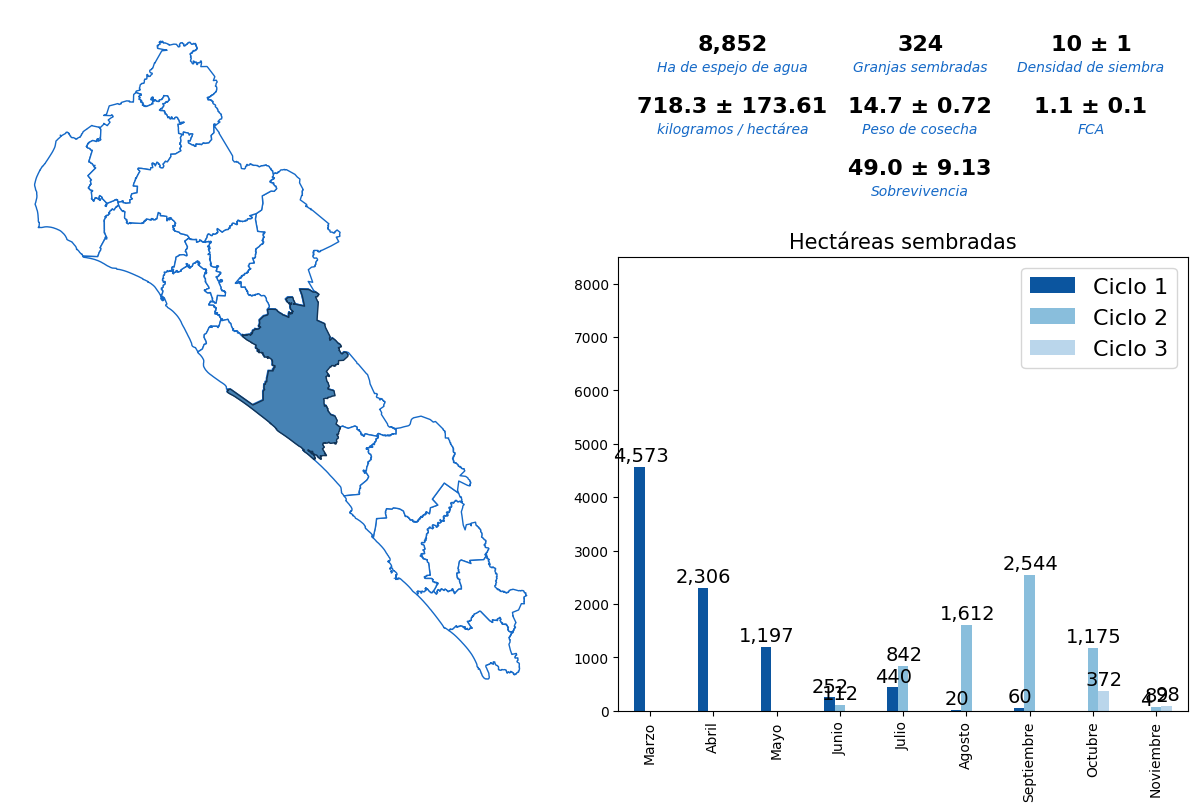

In [25]:
angostura.plots(), ahome.plots(), guasave.plots(), navolato.plots () , culiacan.plots()

[Text(0, 0, 'Marzo'),
 Text(1, 0, 'Abril'),
 Text(2, 0, 'Mayo'),
 Text(3, 0, 'Junio'),
 Text(4, 0, 'Julio'),
 Text(5, 0, 'Agosto'),
 Text(6, 0, 'Septiembre'),
 Text(7, 0, 'Octubre'),
 Text(8, 0, 'Noviembre')]

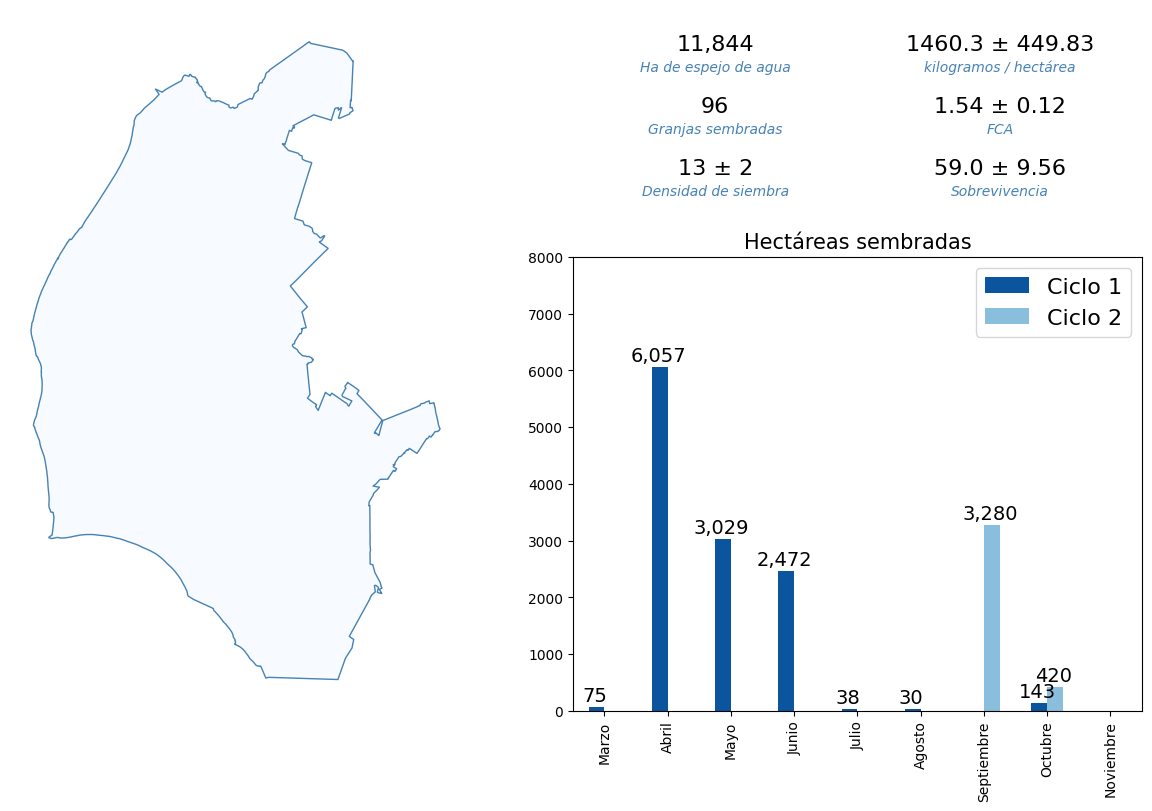

In [26]:
figure_6 = plt.figure ( layout="constrained" , figsize= (12,8)  )

# from matplotlib.gridspec import GridSpec

gs_2 = GridSpec ( 3 , 4 , figure = figure_6   )

ax_1 = figure_6.add_subplot(gs_2[ :  , : 2  ])
ax_2 = figure_6.add_subplot(gs_2[ 0 ,  2: ])
ax_3 = figure_6.add_subplot(gs_2[ 1 : ,  2: ])

def sin_bordes ( ax ) :#quita ejes y marco
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.axis('off')

sin_bordes (ax_1)
sin_bordes (ax_2)

#mapa

ahome.map.plot ( ax = ax_1 , color = 'white' , edgecolor = 'steelblue' , cmap = 'Blues' )

#Datos
ax_2.annotate ( 'Ha de espejo de agua' , ( .25,.7 ) ,  horizontalalignment = 'center' , fontsize = 10 , style = 'italic' , color = 'steelblue' )
ax_2.annotate ( 'Granjas sembradas' , ( .25,.4 ) ,  horizontalalignment = 'center' , fontsize = 10 , style = 'italic' , color = 'steelblue' )
ax_2.annotate ( 'Densidad de siembra' , ( .25, .1 ) ,  horizontalalignment = 'center' , fontsize = 10 , style = 'italic' , color = 'steelblue' )
ax_2.annotate ( 'kilogramos / hectárea' , ( .75,.7 ) ,  horizontalalignment = 'center' , fontsize = 10 , style = 'italic' , color = 'steelblue' )
ax_2.annotate ( 'FCA' , ( .75 ,0.4 ) ,  horizontalalignment = 'center' , fontsize = 10 , style = 'italic' , color = 'steelblue' )
ax_2.annotate ( 'Sobrevivencia' , ( .75 ,0.1 ) ,  horizontalalignment = 'center' , fontsize = 10 , style = 'italic' , color = 'steelblue' )

ax_2.annotate ( ahome.hectáreas , ( .25,.8 ) ,  horizontalalignment = 'center' , fontsize = 16 )
ax_2.annotate ( ahome.granjas , ( .25,.5 ) ,  horizontalalignment = 'center' , fontsize = 16 )
ax_2.annotate ( ahome.densidad , ( .25, .2 ) ,  horizontalalignment = 'center' , fontsize = 16 )
ax_2.annotate ( ahome.kg_ha , ( .75,.8 ) ,  horizontalalignment = 'center' , fontsize = 16 )
ax_2.annotate ( ahome.fca , ( .75 ,0.5 ) ,  horizontalalignment = 'center' , fontsize = 16 )
ax_2.annotate ( ahome.sobrevivencia , ( .75 ,0.2 ) ,  horizontalalignment = 'center' , fontsize = 16 )
#Siembras 
regi = 'ahome'
fig_4_i = siembra_region.query ( ''' jsla == '{}' '''.format (regi) )

fig_4 = fig_4_i [ [ 'hectareas_sembradas_periodo' , 'ciclo' ] ].pivot ( columns = ('ciclo') ).plot.bar ( ax = ax_3 , color = [pallete_2 [0] ] + [pallete_2 [ 3 ] ] + [pallete_2 [ 4 ]] , 
                                                                                                        title =  'Hectáreas sembradas' , xlabel = ''  )
fig_4.legend ( ['Ciclo 1' , 'Ciclo 2' , 'Ciclo 3'] , title = False, fontsize = 16 )
fig_4.set_ylim ( 0 , 8000 )
info_bars_v ( fig_4 , 100 , 14 , x = .1)
ax_3.title.set_size (15)
ax_3.set_xticklabels ( ['Marzo' , 'Abril' , 'Mayo' , 'Junio' , 'Julio' , 'Agosto' , 'Septiembre' , 'Octubre' , 'Noviembre' ] )

In [27]:
cosecha.query('''jsla == 'navolato' and kg_ha != 0 and kg_ha < 2500''').kg_ha.std()#.plot.hist() 

256.2296611448109

**BDFGSD**

asdas